# Assessments

Congratulations on finishing the MPL course!! Hopefully, you learned some valuable skills along the way and had fun doing it. Now it is time to put those skills to the test. In this assessment we have two problems:  First, you will train a new model capable of classifying the $10$ different classes all included in the database known as [_CIFAR-10_](https://www.cs.toronto.edu/~kriz/cifar.html). You will need to get the model to a validation to pass the assessment, although we challenge you to do even better if you can. You will have to use the skills you learned in the previous exercises.  Second, you will solve [_Kaggle's Titanic_](https://www.kaggle.com/competitions/titanic) challenge. The task consists of processing the data, generating the model, and doing a Deploy. Let's get started! 

## The Problem #1: `CIFAR-10 Classification`

<p style='text-align: justify;'>
To start studying neural networks, it is necessary to understand and be able to apply the most basic concepts of recognition to your model. A good way to test and train your model is to use the CIFAR-10 database which consists of a set of $60,000$ images for $10$ different classes (planes, cars, birds, cats, deer, dogs, frogs, horses, ships and trucks) which are identified from $0$ to $9$ respectively. With that in mind, you will train your model on top of this base, making it possible to correctly recognize each element of these classes.
</p>    

<p style="text-align: center;">
 <img src="../images/cifar-10.png">
</p>

### Characteristics of images from the CIFAR-10 database

The images have dimensions of $32$x$32$ so remember to adjust your image when making a prediction with the model, for each class there are $6,000$ images related to its type so you must best adjust the number of training epochs as well as the learning rate.

Then:

1. Create an MLP Neural Network.

2. Import the CIFAR-10 database from the torchvision library.

3. Train your model so that it correctly performs predictions, paying attention to the input parameters.

4. Perform the prediction with some image.

## The Problem #2: `Titanic`

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in 1502 out of 2224 passenger and crew deaths.

While some element of luck was involved in surviving, some groups were more likely to survive than others.

In this problem, we ask you to build a predictive model that answers the question: _What sorts of people were more likely to survive?_ using passenger data (i.e., name, age, gender, socio-economic class, etc).

In this competition, you will gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv`, and the other is titled `test.csv`.

`train.csv` will contain the details of a subset of the passengers on board ($891$ to be exact) and, importantly, will reveal whether they survived, also known as the _ground truth_.

The `test.csv` dataset contains similar information but does not disclose the _ground truth_ for each passenger. It is your job to predict these outcomes.

Using the patterns in the `train.csv` data, predict whether the other $418$ passengers on board (found in `test.csv`) survived.

Check out the *Data* tab to explore the datasets even further. Once you feel you have created a competitive model, please submit it to Kaggle to see where your model stands on our leaderboard against other Kagglers.

### Data Dictionary

| Variable | Definition | 	Key |
|----------|------------|-------|
| survival | Survival	| 0 = No, 1 = Yes|
| pclass   | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex	   | Sex	| |
| Age	   | Age in years	| |
| sibsp	   | # of siblings / spouses aboard the Titanic	| |
| parch	   | # of parents / children aboard the Titanic	| |
| ticket   | Ticket number	| |
| fare	   | Passenger fare	| |
| cabin	   | Cabin number	| |
| embarked | Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton |

#### Variable Notes

**pclass**: A proxy for socio-economic status (SES)

1st = Upper
2nd = Middle
3rd = Lower

---

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

----

**sibsp**: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

----
**parch**: The dataset defines family relations in this way...

Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

Congratulations on finishing the MPL course!! Hopefully, you learned some valuable skills along the way and had fun doing it. Now it is time to put those skills to the test. In this assessment, you will train a new model capable of classifying the 10 different classes all included in the database known as [_CIFAR-10_](https://www.cs.toronto.edu/~kriz/cifar.html). You will need to get the model to a validation to pass the assessment, although we challenge you to do even better if you can. You will have to use the skills you learned in the previous exercises. Let's get started! 

### ☆ Solution Problem #1 - CIFAR-10 Classification ☆ 

#### ⊗ Define the MLP Architecture

These libraries are used to import and manipulate PyTorch tensors, define the MLP architecture, define the loss function, optimize the model, import the CIFAR-10 database, perform image transformations and calculate evaluation metrics.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision.transforms import transforms
import numpy as np
import os
from PIL import Image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

input_size = 3072  # input size (32 x 32)
hidden_size = 128
output_size = 10
learning_rate = 0.01
num_epochs = 200

# Convert to tensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
]) 

# Load torchvision CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./datasets', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

model = MLP(input_size, hidden_size, output_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Loop
for epoch in range(num_epochs):
    total_loss = 0
    for images, labels in trainloader:
        # Resize images to a one-dimensional vector
        images = images.view(-1, input_size)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimzation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Print the average loss each epoch
    average_loss = total_loss / len(trainloader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}")

Files already downloaded and verified
Epoch 1/200, Loss: 1.7874
Epoch 2/200, Loss: 1.5803
Epoch 3/200, Loss: 1.4990
Epoch 4/200, Loss: 1.4385
Epoch 5/200, Loss: 1.3875
Epoch 6/200, Loss: 1.3451
Epoch 7/200, Loss: 1.3088
Epoch 8/200, Loss: 1.2762
Epoch 9/200, Loss: 1.2464
Epoch 10/200, Loss: 1.2200
Epoch 11/200, Loss: 1.1947
Epoch 12/200, Loss: 1.1714
Epoch 13/200, Loss: 1.1467
Epoch 14/200, Loss: 1.1262
Epoch 15/200, Loss: 1.1061
Epoch 16/200, Loss: 1.0858
Epoch 17/200, Loss: 1.0689
Epoch 18/200, Loss: 1.0500
Epoch 19/200, Loss: 1.0325
Epoch 20/200, Loss: 1.0162
Epoch 21/200, Loss: 1.0014
Epoch 22/200, Loss: 0.9828
Epoch 23/200, Loss: 0.9683
Epoch 24/200, Loss: 0.9530
Epoch 25/200, Loss: 0.9377
Epoch 26/200, Loss: 0.9222
Epoch 27/200, Loss: 0.9112
Epoch 28/200, Loss: 0.8966
Epoch 29/200, Loss: 0.8812
Epoch 30/200, Loss: 0.8672
Epoch 31/200, Loss: 0.8566
Epoch 32/200, Loss: 0.8416
Epoch 33/200, Loss: 0.8309
Epoch 34/200, Loss: 0.8178
Epoch 35/200, Loss: 0.8059
Epoch 36/200, Loss: 0.7957

#### ⊗  Images Test

The `path_image` is a directory where the test images are located. The following have some images valitations:

- validation-model-cifar10-cat.jpg
- validation-model-cifar10-dog.jpg
- validation-model-cifar10-bird.jpg

In [2]:
path_image = './images/validation-model-cifar10-dog.jpg'

#### ⊗  Image Pre-processing

In [3]:
# Enter the path to your image here
image = Image.open(path_image) 

# Image pre-processing
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize to expected input size
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values
])
image = transform(image)

# Add an extra dimension in the image tensor and resize image
image = image.unsqueeze(0)
image = image.view(-1, input_size)

# Passing through the neural network
model.eval()  # Change model mode to evaluation
with torch.no_grad():
    output = model(image)

# Results
probabilities = torch.softmax(output, dim=1)
predicted_class = torch.argmax(probabilities, dim=1).item()

classes_Cifar10 = ["Airplane","Car","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]

print(f"Expected class: {classes_Cifar10[predicted_class]}")

Expected class: Dog


#### ⊗ Display of the image

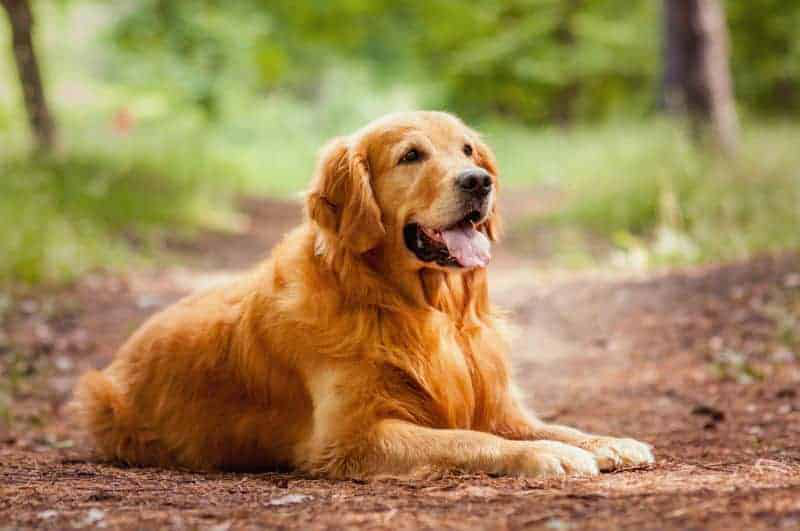

In [4]:
#This will import and display a .jpg image in Jupyter:
from IPython.display import display
from PIL import Image
display(Image.open(path_image))

### ☆ Solution Problem #2 - Titanic ☆

In [89]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

Vamos ler os arquivos de treinamento:

In [90]:
path = "../datasets/titanic"

In [98]:
train_data = pd.read_csv(f"{path}/train.csv", sep=",")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [92]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [99]:
def display_missing(train_data):    
    for col in train_data.columns.tolist():          
        print('{} dados faltando: {}'.format(col, train_data[col].isnull().sum()))
    print('\n')
    
display_missing(train_data)

PassengerId dados faltando: 0
Survived dados faltando: 0
Pclass dados faltando: 0
Name dados faltando: 0
Sex dados faltando: 0
Age dados faltando: 177
SibSp dados faltando: 0
Parch dados faltando: 0
Ticket dados faltando: 0
Fare dados faltando: 0
Cabin dados faltando: 687
Embarked dados faltando: 2




Carregando os dados de teste:

In [100]:
test_data = pd.read_csv(f"{path}/test.csv", sep=",")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [95]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


### Tratando os dados

1. Remover nome e tickets

2. Mapear Sex para:

Male: 0
Female: 1

3. Mapear Embarked para:

C: 0
Q: 1
S: 2

In [101]:
mapping_sex = {'male': 0, 'female': 1}
train_data = train_data.replace({'Sex': mapping_sex})
test_data = test_data.replace({'Sex': mapping_sex})

In [102]:
mapping_embarked = {'C': 0, 'Q': 1, 'S': 2}
train_data = train_data.replace({'Embarked': mapping_embarked})
test_data = test_data.replace({'Embarked': mapping_embarked})

Precisamos preencher os dados faltando de idade. Para isso vamos tentar achar a correlação entre idade e demais atributos:

In [103]:
train_data_corr = train_data.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
train_data_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
train_data_corr[train_data_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
7,Age,Age,1.000000
16,Age,Pclass,0.369226
20,Age,SibSp,0.308247
30,Age,Parch,0.189119
46,Age,Fare,0.096067
47,Age,Sex,0.093254
54,Age,Survived,0.077221
64,Age,PassengerId,0.036847
70,Age,Embarked,0.032565


Percebemos que existe uma alta correlação entre idade e Pclass, então podemos utilizar Pclass para tentar preencher idade.


Além disso, temos uma suspeita que o sexo pode influenciar muito na média se utilizarmos a classe social (fenômeno velho da lancha)

In [104]:
age_by_pclass_sex = train_data.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    # 0 - male, 1 - female
    for sex in [1, 0]:
        print('Idade média de Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Idade média de todos: {}'.format(train_data['Age'].median()))

Idade média de Pclass 1 1s: 35.0
Idade média de Pclass 1 0s: 40.0
Idade média de Pclass 2 1s: 28.0
Idade média de Pclass 2 0s: 30.0
Idade média de Pclass 3 1s: 21.5
Idade média de Pclass 3 0s: 25.0
Idade média de todos: 28.0


A idade média diferente muito entre as classes e sexo. Então podemos utilizar essas duas informações para preencher os dados

In [105]:
train_data['Age'] = train_data.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [106]:
display_missing(train_data)

PassengerId dados faltando: 0
Survived dados faltando: 0
Pclass dados faltando: 0
Name dados faltando: 0
Sex dados faltando: 0
Age dados faltando: 0
SibSp dados faltando: 0
Parch dados faltando: 0
Ticket dados faltando: 0
Fare dados faltando: 0
Cabin dados faltando: 687
Embarked dados faltando: 2




In [15]:
display_missing(test_data)

PassengerId dados faltando: 0
Pclass dados faltando: 0
Name dados faltando: 0
Sex dados faltando: 0
Age dados faltando: 86
SibSp dados faltando: 0
Parch dados faltando: 0
Ticket dados faltando: 0
Fare dados faltando: 1
Cabin dados faltando: 327
Embarked dados faltando: 0




Agora vamos tentar tratar as cabines faltando. Achamos que a posição da cabine no navio deve ter influencia na sobrevivencia (quem bateu primeiro pode ter morrido da batida por exemplo).

E sabemos que a organização normalmente é por classe social. Então vamos tentar relacionar a primeira letra da cabine (que deve ser o setor) com a classe social

In [107]:
# vamos colocar M de missing nos dados faltantes
train_data['Cabin'] = train_data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
test_data['Cabin'] = test_data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

In [108]:
train_data['Cabin']

0      M
1      C
2      M
3      C
4      M
      ..
886    M
887    B
888    M
889    C
890    M
Name: Cabin, Length: 891, dtype: object

Vamos tentar relacionar a letra com a classe

In [109]:
display_missing(train_data)

PassengerId dados faltando: 0
Survived dados faltando: 0
Pclass dados faltando: 0
Name dados faltando: 0
Sex dados faltando: 0
Age dados faltando: 0
SibSp dados faltando: 0
Parch dados faltando: 0
Ticket dados faltando: 0
Fare dados faltando: 0
Cabin dados faltando: 0
Embarked dados faltando: 2




In [110]:
display_missing(test_data)

PassengerId dados faltando: 0
Pclass dados faltando: 0
Name dados faltando: 0
Sex dados faltando: 0
Age dados faltando: 86
SibSp dados faltando: 0
Parch dados faltando: 0
Ticket dados faltando: 0
Fare dados faltando: 1
Cabin dados faltando: 0
Embarked dados faltando: 0




In [111]:
train_data_cabin_corr = train_data.groupby(['Cabin', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

In [112]:
train_data_cabin_corr

Cabin    A   B   C   D      E        F     G   M            T
Pclass   1   1   1   1  2   1  2  3  2  3  3   1    2    3  1
Count   15  47  59  29  4  25  4  3  8  5  4  40  168  479  1

In [113]:
mapping_cabin = {'A': 0, 'B': 0, 'C': 0, 'D': 1, 'E': 1, 'F': 2, 'G': 2, 'T': 2, 'M': 3}
train_data = train_data.replace({'Cabin': mapping_cabin})
test_data = test_data.replace({'Cabin': mapping_cabin})

In [114]:
display_missing(train_data)

PassengerId dados faltando: 0
Survived dados faltando: 0
Pclass dados faltando: 0
Name dados faltando: 0
Sex dados faltando: 0
Age dados faltando: 0
SibSp dados faltando: 0
Parch dados faltando: 0
Ticket dados faltando: 0
Fare dados faltando: 0
Cabin dados faltando: 0
Embarked dados faltando: 2




Agora só falta tratar o embarked, que tem 2 faltando.

In [115]:
train_data_corr = train_data.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
train_data_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
train_data_corr[train_data_corr['Feature 1'] == 'Embarked']

,Feature 1,Feature 2,Correlation Coefficient
9,Embarked,Embarked,1.000000
34,Embarked,Fare,0.226311
39,Embarked,Cabin,0.192906
44,Embarked,Survived,0.169718
46,Embarked,Pclass,0.164681
59,Embarked,Sex,0.110320
66,Embarked,SibSp,0.068900
75,Embarked,Parch,0.040449
91,Embarked,PassengerId,0.013166
94,Embarked,Age,0.009944


In [116]:
train_data[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,0,NaN


In [117]:
#para não precisar tratar o embarked
train_data = train_data.dropna()

In [118]:
train_data = train_data[[col for col in train_data.columns if col not in ['Name', 'Ticket']]]
test_data = test_data[[col for col in test_data.columns if col not in ['Name', 'Ticket']]]

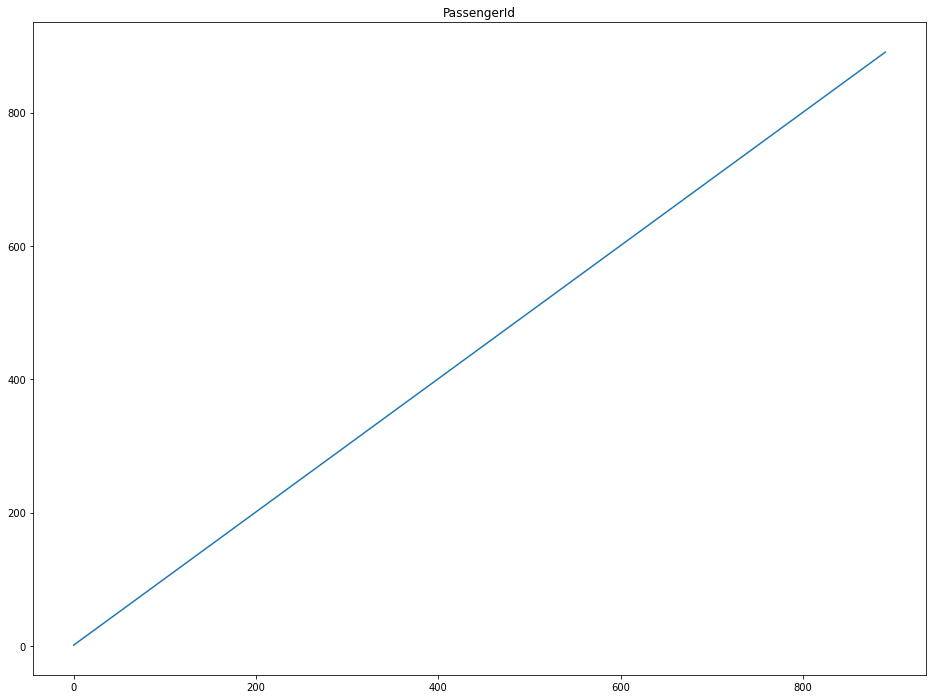

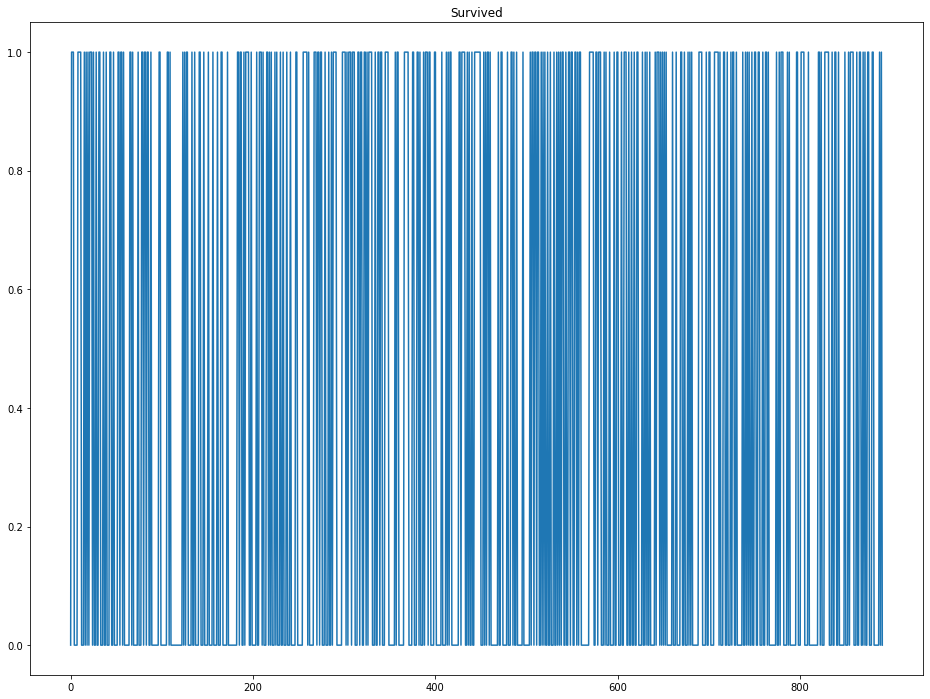

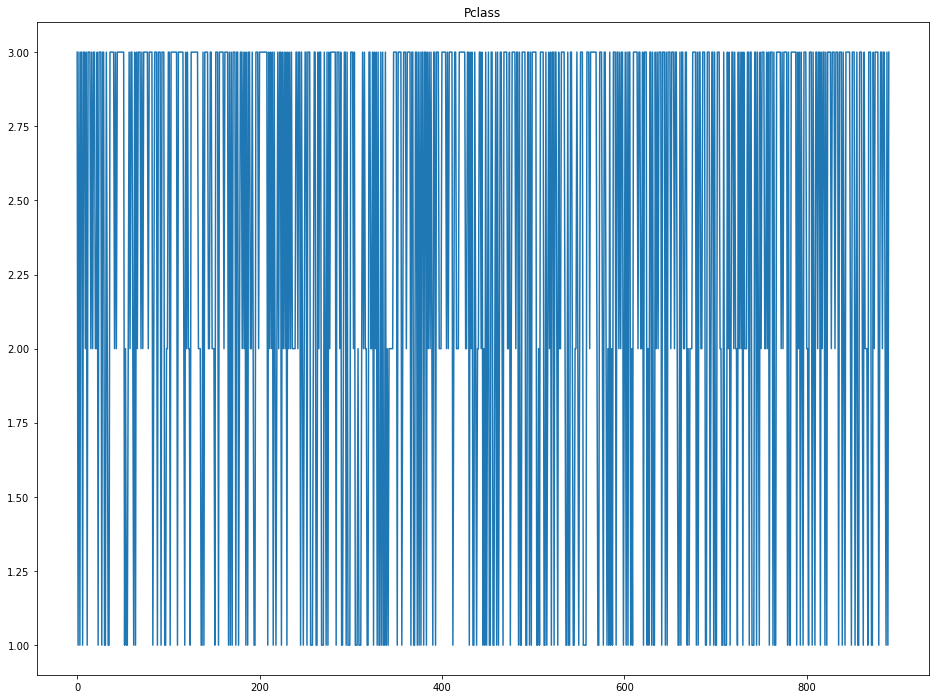

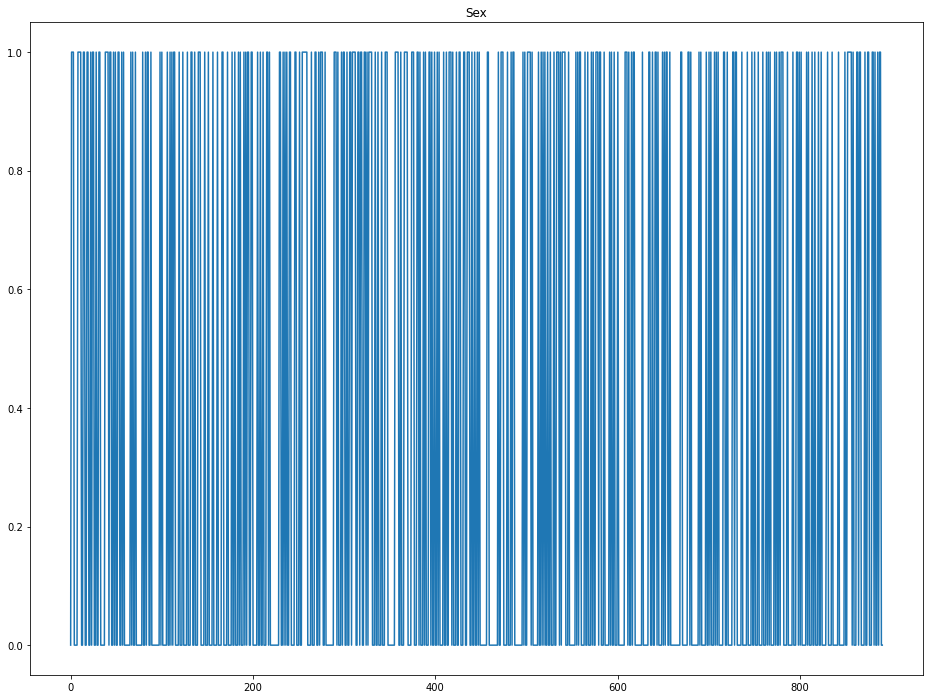

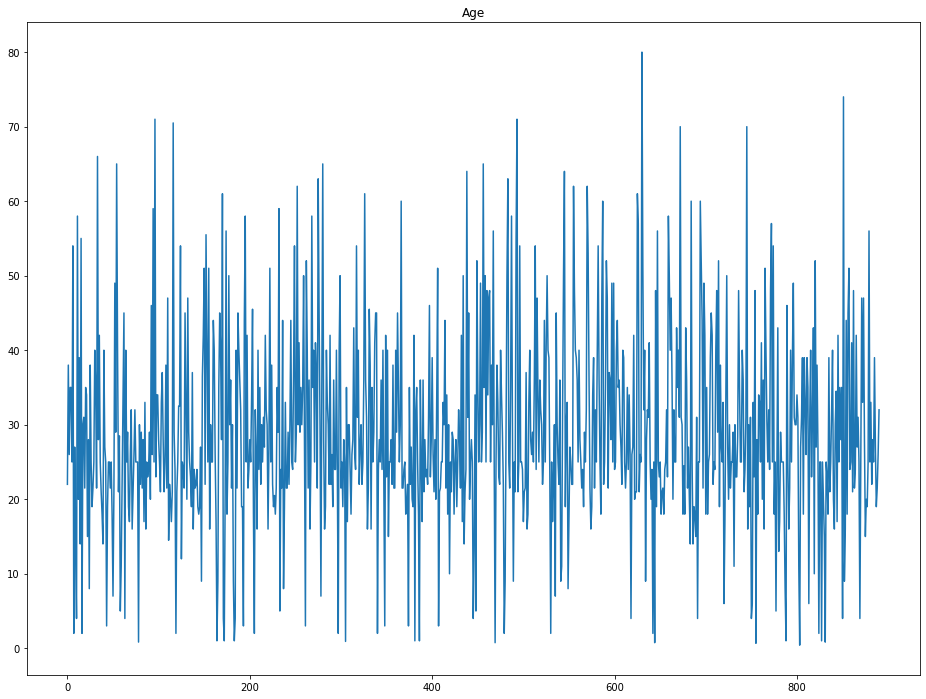

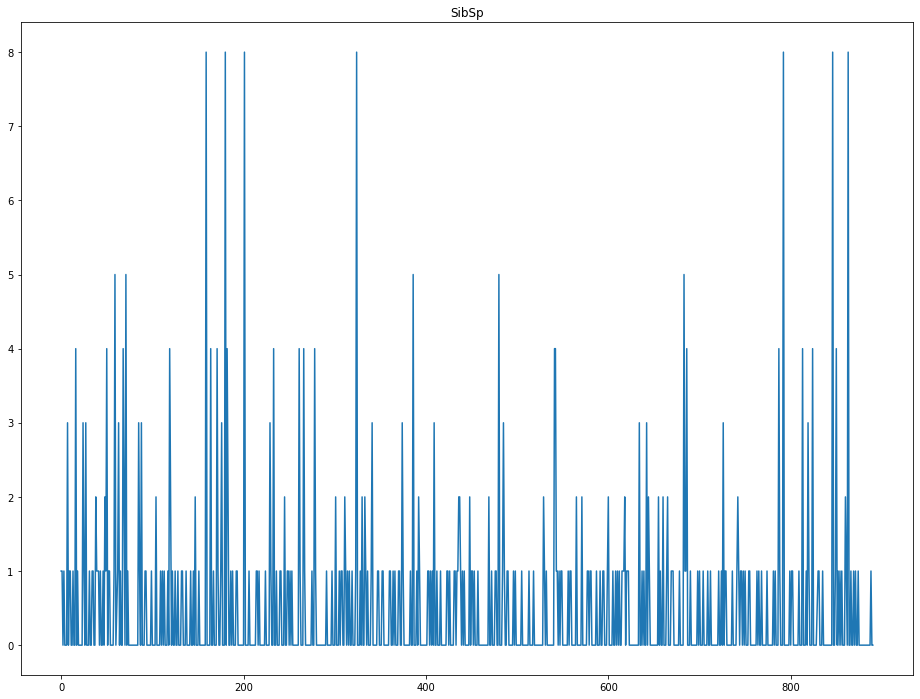

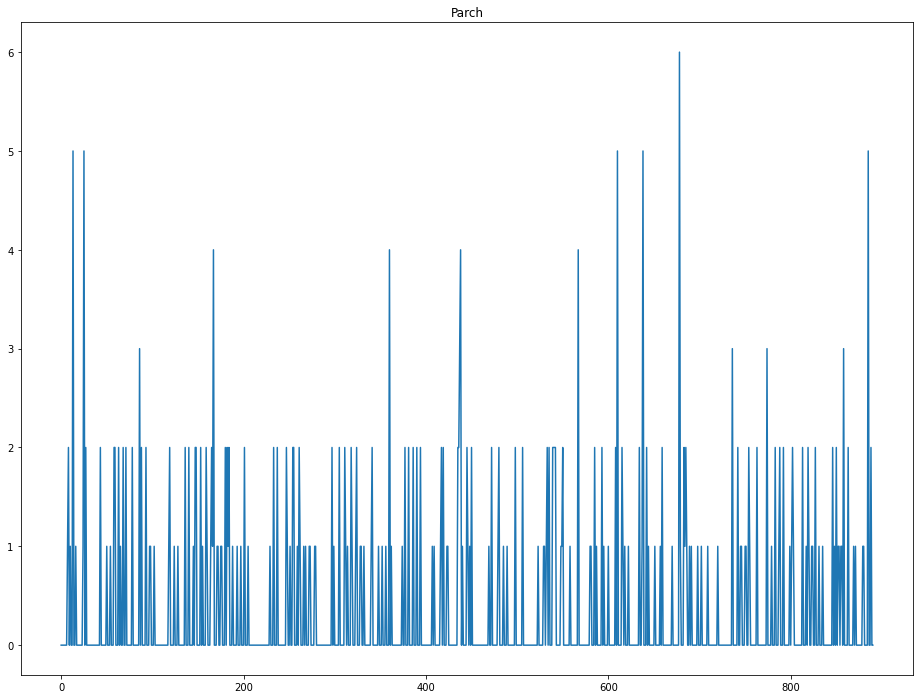

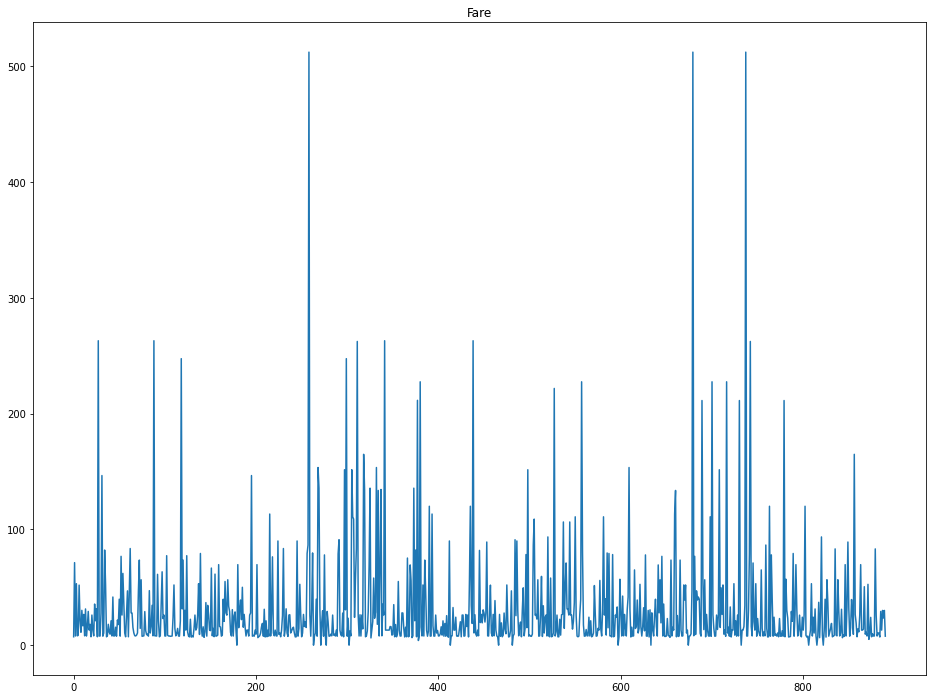

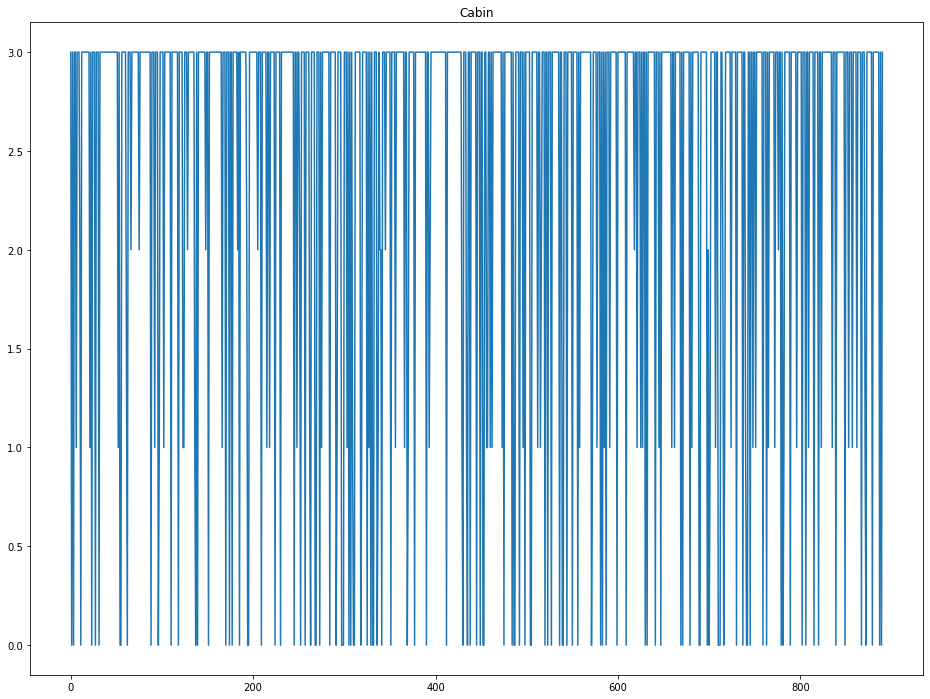

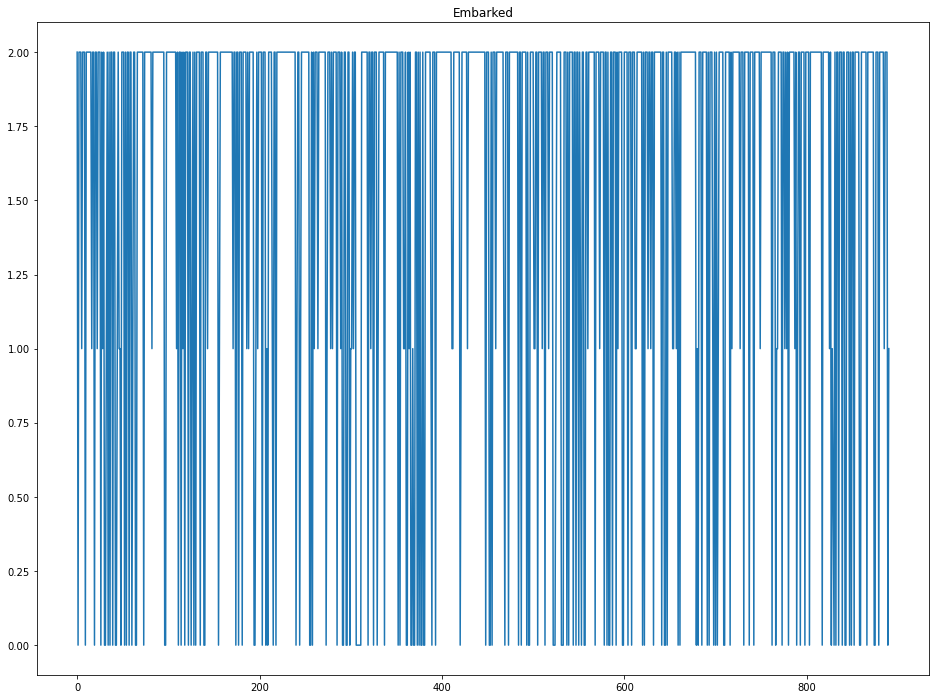

In [119]:
for col in train_data.columns:
    plt.figure(figsize=[16, 12])
    train_data[col].plot()
    plt.title(col)

## Solução MLP

Agora vamos separar a saída:

In [120]:
mlp_train_datax = train_data[[col for col in train_data.columns if col not in ['Survived']]]
mlp_train_datay = train_data[['Survived']]

In [121]:
mlp_train_datax.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Pclass       889 non-null    int64  
 2   Sex          889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Cabin        889 non-null    int64  
 8   Embarked     889 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 69.5 KB


In [122]:
mlp_x_train = mlp_train_datax.values
mlp_y_train = mlp_train_datay.values

In [123]:
mlp_x_test = test_data.values
mlp_x_test

array([[8.92000e+02, 3.00000e+00, 0.00000e+00, ..., 7.82920e+00,
        3.00000e+00, 1.00000e+00],
       [8.93000e+02, 3.00000e+00, 1.00000e+00, ..., 7.00000e+00,
        3.00000e+00, 2.00000e+00],
       [8.94000e+02, 2.00000e+00, 0.00000e+00, ..., 9.68750e+00,
        3.00000e+00, 1.00000e+00],
       ...,
       [1.30700e+03, 3.00000e+00, 0.00000e+00, ..., 7.25000e+00,
        3.00000e+00, 2.00000e+00],
       [1.30800e+03, 3.00000e+00, 0.00000e+00, ..., 8.05000e+00,
        3.00000e+00, 2.00000e+00],
       [1.30900e+03, 3.00000e+00, 0.00000e+00, ..., 2.23583e+01,
        3.00000e+00, 0.00000e+00]])

Vamos escalar os dadoas

In [124]:
from sklearn.preprocessing import StandardScaler
mlp_x_train = StandardScaler().fit_transform(mlp_x_train)
mlp_x_test = StandardScaler().fit_transform(mlp_x_test)
# scaler.transform(x_test)

In [125]:
num_classes = 2
mlp_y_train = tf.keras.utils.to_categorical(mlp_y_train, num_classes)

In [127]:
mlp_model = tf.keras.models.Sequential()
mlp_model.add(tf.keras.layers.Dense(9, activation=tf.keras.activations.relu ,input_shape=(mlp_x_train.shape[1],)))
mlp_model.add(tf.keras.layers.Dense(9, activation=tf.keras.activations.relu))
mlp_model.add(tf.keras.layers.Dense(mlp_y_train.shape[1], activation=tf.keras.activations.relu))
mlp_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

mlp_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 9)                 90        
                                                                 
 dense_9 (Dense)             (None, 9)                 90        
                                                                 
 dense_10 (Dense)            (None, 2)                 20        
                                                                 
 dense_11 (Dense)            (None, 2)                 6         
                                                                 
Total params: 206
Trainable params: 206
Non-trainable params: 0
_________________________________________________________________


In [128]:
mlp_model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adamax(),
              metrics=['accuracy'])

In [129]:
mlp_history = mlp_model.fit(mlp_x_train, mlp_y_train,
            batch_size=32,
            epochs=200,
            verbose=1,
            validation_split=.2)

Epoch 1/200
23/23 [==============================] - 1s 20ms/step - loss: 0.7007 - accuracy: 0.6104 - val_loss: 0.7002 - val_accuracy: 0.6461
Epoch 2/200
23/23 [==============================] - 0s 8ms/step - loss: 0.6932 - accuracy: 0.6104 - val_loss: 0.6945 - val_accuracy: 0.6461
Epoch 3/200
23/23 [==============================] - 0s 5ms/step - loss: 0.6881 - accuracy: 0.6104 - val_loss: 0.6910 - val_accuracy: 0.6461
Epoch 4/200
23/23 [==============================] - 0s 9ms/step - loss: 0.6837 - accuracy: 0.6104 - val_loss: 0.6882 - val_accuracy: 0.6461
Epoch 5/200
23/23 [==============================] - 0s 5ms/step - loss: 0.6783 - accuracy: 0.6104 - val_loss: 0.6856 - val_accuracy: 0.6461
Epoch 6/200
23/23 [==============================] - 0s 4ms/step - loss: 0.6715 - accuracy: 0.6104 - val_loss: 0.6732 - val_accuracy: 0.6461
Epoch 7/200
23/23 [==============================] - 0s 3ms/step - loss: 0.6640 - accuracy: 0.6104 - val_loss: 0.6614 - val_accuracy: 0.6461
Epoch 8/200


In [130]:
mlp_model.save(f"{path}/mlp")

INFO:tensorflow:Assets written to: /Users/larissa/titanic/mlp/assets


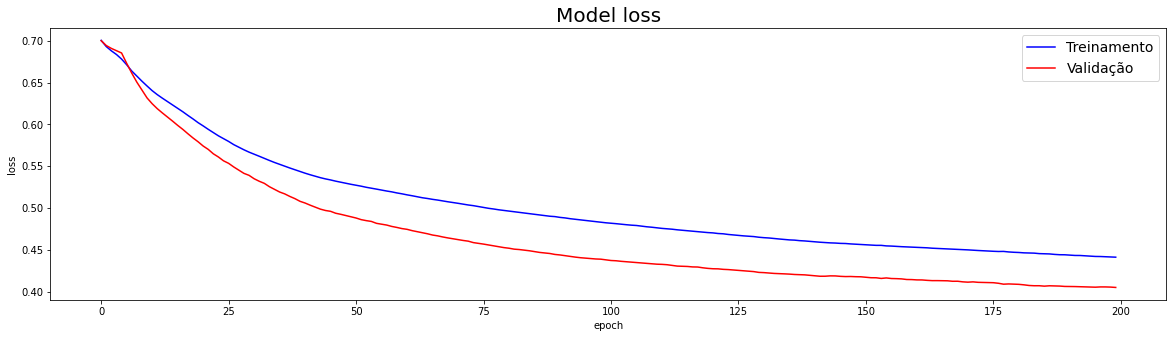

In [131]:
# Plotando o historico do processo de treinamento
plt.figure(figsize=(20, 5))
plt.plot(mlp_history.history['loss'], color='blue')
plt.plot(mlp_history.history['val_loss'], color='red')
plt.title('Model loss', fontsize=20)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Validação'], loc='upper right', fontsize=14)
plt.show()

In [132]:
mlp_y_pred = mlp_model.predict(mlp_x_test)
mlp_y_pred

14/14 [==============================] - 0s 1ms/step


array([[0.9334133 , 0.06658669],
       [0.53643984, 0.46356016],
       [0.9379897 , 0.0620103 ],
       [0.91819066, 0.08180935],
       [0.5200521 , 0.47994795],
       [0.8910858 , 0.10891414],
       [0.3498432 , 0.6501568 ],
       [0.81217754, 0.18782246],
       [0.24988532, 0.7501147 ],
       [0.9081238 , 0.09187629],
       [       nan,        nan],
       [0.9269386 , 0.07306138],
       [0.31176385, 0.6882361 ],
       [0.92523074, 0.07476924],
       [0.4293967 , 0.5706033 ],
       [0.24988532, 0.7501147 ],
       [0.8751716 , 0.12482838],
       [0.8143495 , 0.18565054],
       [0.45607546, 0.5439245 ],
       [0.5444774 , 0.4555225 ],
       [0.92567813, 0.07432186],
       [0.6298096 , 0.37019035],
       [       nan,        nan],
       [0.5060211 , 0.49397892],
       [0.24988532, 0.7501147 ],
       [0.95064443, 0.04935557],
       [0.24988532, 0.7501147 ],
       [0.82452023, 0.17547977],
       [0.77762574, 0.22237429],
       [       nan,        nan],
       [0.

In [134]:
mlp_predictions = np.array(mlp_y_pred).argmax(axis = 1)

mlp_predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [135]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': mlp_predictions})
output.to_csv(f"{path}/mlp_submission.csv", index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Clear the Memory

Before moving on, please execute the following cell to clear up the CPU memory. This is required to move on to the next notebook.

In [ ]:
#import IPython
#app = IPython.Application.instance()
#app.kernel.do_shutdown(True)

## Clear the Temporary Files

Before finished the assessment, please execute the following cell to clear up the directory.

In [5]:
!rm -rf ../models/handwritten-model.pt ../datasets/cifar-10-python.tar.gz  ../datasets/cifar-10-batches-py ../datasets/cifar-10-batches-py ../datasets/MNIST  cifar-10*  